In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
import matplotlib.cm as cm # импортируем цветовые схемы, чтобы рисовать графики.
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('data/train.csv.zip', index_col='id')
print(train.shape)
train.head()

(990, 193)


,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [3]:
x = train.drop(['species'], axis = 1)
x = scale(x)

In [189]:
y = train.species
print(len(set(y)))
print(set(y))

99
{'Quercus_Nigra', 'Quercus_Pyrenaica', 'Alnus_Maximowiczii', 'Quercus_Pontica', 'Populus_Adenopoda', 'Populus_Nigra', 'Fagus_Sylvatica', 'Quercus_Kewensis', 'Tilia_Platyphyllos', 'Acer_Capillipes', 'Quercus_Pubescens', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Liquidambar_Styraciflua', 'Quercus_Shumardii', 'Alnus_Rubra', 'Quercus_x_Hispanica', 'Quercus_Coccifera', 'Quercus_Greggii', 'Quercus_Rubra', 'Liriodendron_Tulipifera', 'Quercus_Texana', 'Alnus_Sieboldiana', 'Quercus_Infectoria_sub', 'Tilia_Tomentosa', 'Cotinus_Coggygria', 'Lithocarpus_Cleistocarpus', 'Alnus_Viridis', 'Phildelphus', 'Acer_Mono', 'Rhododendron_x_Russellianum', 'Morus_Nigra', 'Acer_Saccharinum', 'Quercus_Coccinea', 'Quercus_Palustris', 'Quercus_x_Turneri', 'Lithocarpus_Edulis', 'Eucalyptus_Urnigera', 'Prunus_X_Shmittii', 'Quercus_Vulcanica', 'Acer_Circinatum', 'Cornus_Macrophylla', 'Castanea_Sativa', 'Quercus_Variabilis', 'Betula_Pendula', 'Ilex_Cornuta', 'Quercus_Afares', 'Acer_Palmatum', 'Viburnum_Tinus

In [190]:
le = LabelEncoder().fit(y)
labels = le.transform(y)

In [72]:
tsne = TSNE(n_components=2, random_state=42, init='pca')
tsne_representation = tsne.fit_transform(x)

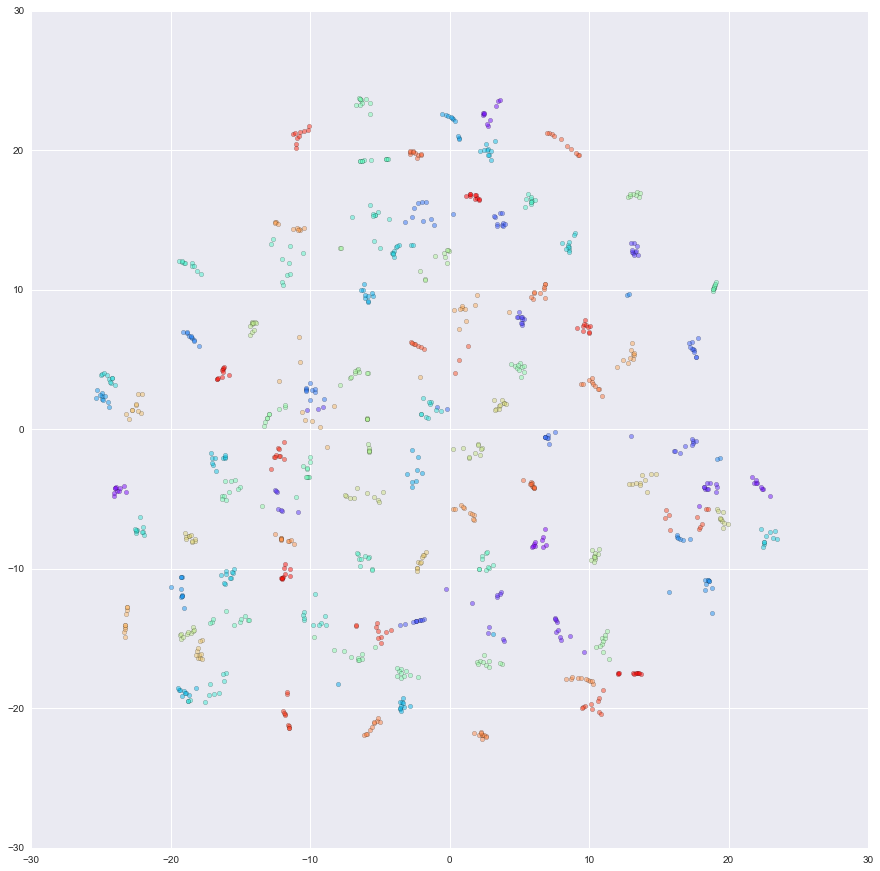

In [73]:
plt.subplots(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, len(set(y))))
for y_, c in zip(set(y), colors):
    plt.scatter(tsne_representation[y.values==y_, 0], 
                tsne_representation[y.values==y_, 1], c=c, alpha=0.5, label=str(y_))
# plt.legend()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

LogLoss 1: -1.0466295877246652 +- 0.1947437322489769
LogLoss 2: -0.7107743890906759 +- 0.08518313462028751
LogLoss 3: -0.6535911765532187 +- 0.12469253242914052
LogLoss 4: -0.5568550380905538 +- 0.05883989294558251
LogLoss 5: -0.46256519011918024 +- 0.042799352104289444
LogLoss 6: -0.4687607819480535 +- 0.042743751760922384
LogLoss 7: -0.34640041848956 +- 0.0398635721800551
LogLoss 8: -0.3203049732027926 +- 0.04990787706679762
LogLoss 9: -0.30850656261045095 +- 0.03697546488005312
LogLoss 10: -0.3274665648940513 +- 0.03687340555126724
LogLoss 11: -0.3463052073635867 +- 0.03723881994700072
LogLoss 12: -0.3640401874417373 +- 0.03752296061271971
LogLoss 13: -0.34929664465798094 +- 0.03240439345670505
LogLoss 14: -0.36503636692374364 +- 0.032290406524967674
LogLoss 15: -0.37977257763033 +- 0.0324212106810888
LogLoss 16: -0.39439460902244494 +- 0.032542762020282806
LogLoss 17: -0.4087548052411358 +- 0.03248039024816712
LogLoss 18: -0.42162639728182416 +- 0.032489700189655094
LogLoss 19: -0.

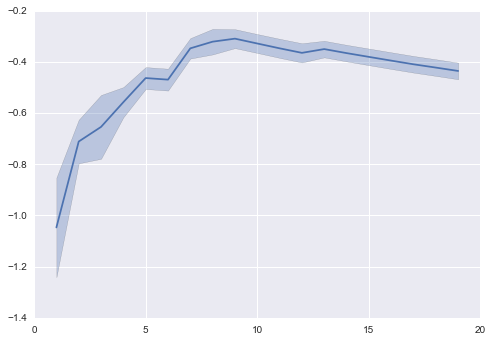

In [74]:
scores_n = []

for n in range(1, 20):
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=n, weights='distance', algorithm='ball_tree'), tsne_representation, labels, scoring='neg_log_loss', cv=StratifiedKFold(5))
    print("LogLoss {}: {} +- {}".format(n, scores.mean(), scores.std()**2))
    scores_n.append([n, scores.mean(), scores.std()**2])
    
scores_n = np.array(scores_n)
print(scores_n[:,1].max())
plt.plot(scores_n[:,0], scores_n[:, 1])
plt.fill_between(scores_n[:,0], scores_n[:,1] + scores_n[:,2], scores_n[:,1] - scores_n[:,2], alpha=0.3)

In [75]:
def knn(X, y):
    clf = KNeighborsClassifier()
    params = {
        'n_neighbors': [3, 5, 8, 9, 10, 11, 12], 
        'weights': ['uniform', 'distance'], 
        'algorithm': ['ball_tree', 'kd_tree', 'brute']}
    grid_search = GridSearchCV(clf, param_grid=params, cv=StratifiedKFold(5, random_state=42), scoring='neg_log_loss')
    grid_search.fit(X, y)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    return grid_search

clf = knn(tsne_representation, labels)

Best score: -0.3085065626104344
Best parameters: {'weights': 'distance', 'n_neighbors': 9, 'algorithm': 'brute'}


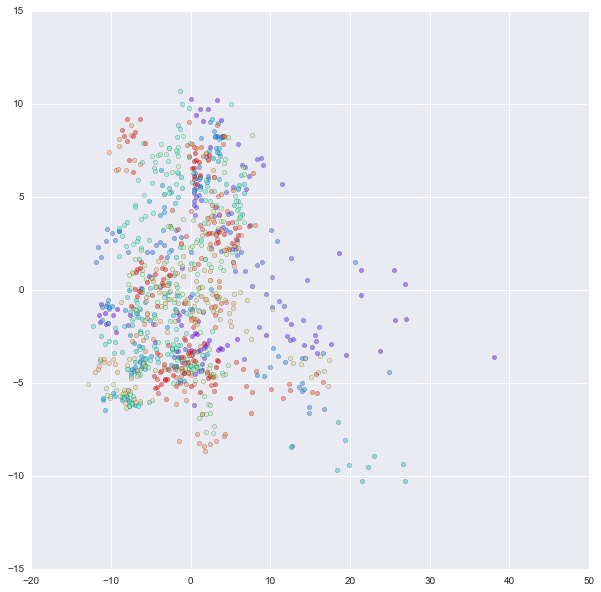

In [11]:
from sklearn.decomposition import PCA

pca_representation = PCA(n_components=2).fit_transform(x)

plt.subplots(figsize=(10,10))
colors = cm.rainbow(np.linspace(0, 1, len(set(y))))
for y_, c in zip(set(y), colors):
    plt.scatter(pca_representation[y.values==y_, 0], 
                pca_representation[y.values==y_, 1], c=c, alpha=0.5, label=str(y_))
# plt.legend()

In [12]:
def plot_variances(d_variances):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()

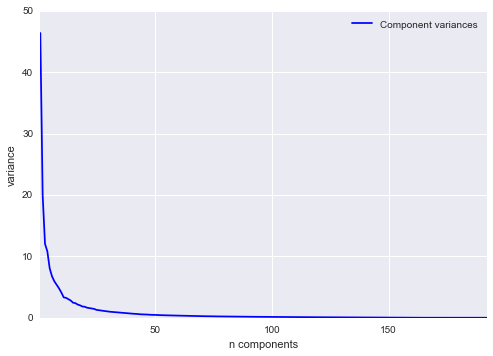

1


In [13]:
projection = pd.DataFrame(PCA(n_components=x.shape[1]).fit_transform(x))
variances = projection.apply(np.var)
plot_variances(variances)
print(variances.diff().idxmin())

Идея!

99 типов листьев - не круто. Слишком много разных. Но на графике TSNE видно, что некоторые группы действительно легко отличить друг от друга, а некотоые - почти не различимы.
С другой стороны мы видим, что у нас есть много типов деревьев и подтипов.
Предложение - разбить сначала всю выборку на типы. Сделать предсказания по типам. Потом по каждому подтипу внутри типа тоже предсказать. Может получится лучше?

34


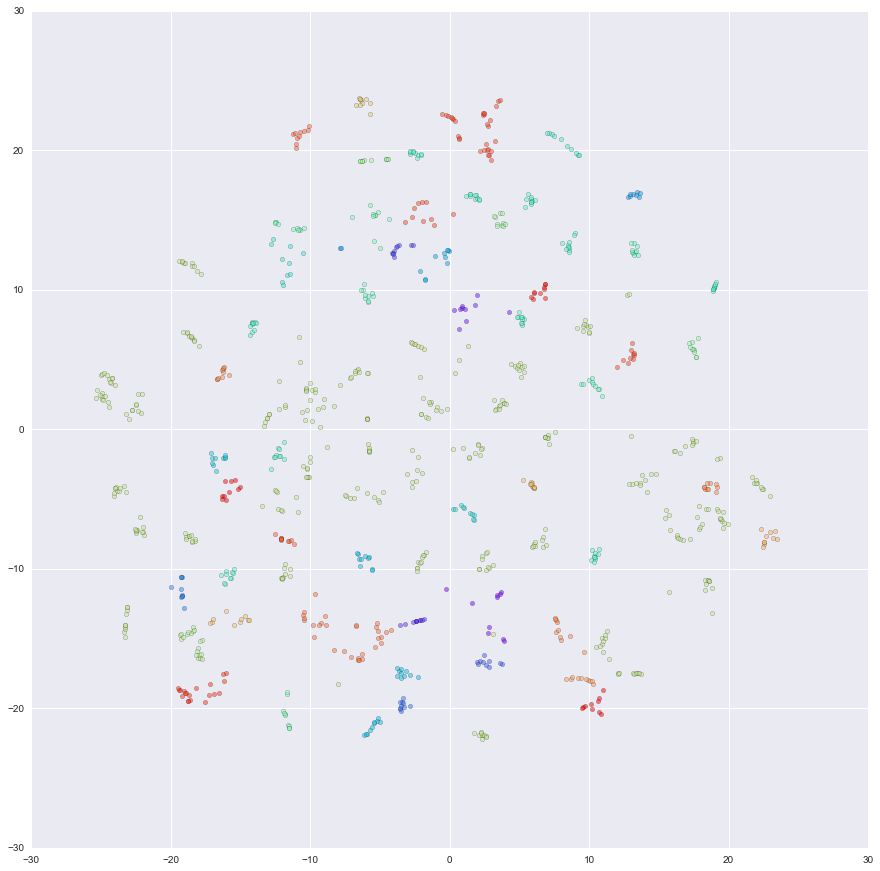

In [76]:
y_groups = y.apply(lambda x: x.split('_')[0])
print(len(set(y_groups)))

plt.subplots(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, len(set(y_groups))))
for y_, c in zip(set(y_groups), colors):
    plt.scatter(tsne_representation[y_groups.values==y_, 0], 
                tsne_representation[y_groups.values==y_, 1], c=c, alpha=0.5, label=str(y_))
# plt.legend()

LogLoss 1: -0.2442135704690988 +- 0.03164585649045875
LogLoss 2: -0.18019787277499746 +- 0.023722907578204024
LogLoss 3: -0.14927945745730437 +- 0.028040334254320374
LogLoss 4: -0.15357826700840077 +- 0.02771712374698532
LogLoss 5: -0.12362183775159148 +- 0.018410902162703517
LogLoss 6: -0.12881936691047244 +- 0.018034176738364535
LogLoss 7: -0.13464996963904668 +- 0.017804428885534733
LogLoss 8: -0.14248033053789586 +- 0.017961079341151195
LogLoss 9: -0.1554267805775714 +- 0.01782600264091232
LogLoss 10: -0.1687894611927762 +- 0.01802579138060505
LogLoss 11: -0.18192441177910607 +- 0.01801073546454744
LogLoss 12: -0.19387613185083236 +- 0.018068523603810994
LogLoss 13: -0.20448899383927888 +- 0.018095803106911387
LogLoss 14: -0.2150157810202443 +- 0.0181052913686374
LogLoss 15: -0.19333477023790901 +- 0.007400975742259147
LogLoss 16: -0.2025588890964789 +- 0.007447960820294902
LogLoss 17: -0.21168903544808754 +- 0.007372226684857849
LogLoss 18: -0.2207260572928344 +- 0.007423905969835

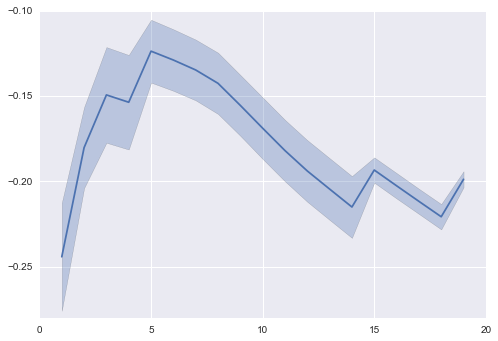

In [77]:
le_groups = LabelEncoder().fit(y_groups)
labels_groups = le_groups.transform(y_groups)

scores_n = []

for n in range(1, 20):
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=n, weights='distance', algorithm='ball_tree'), tsne_representation, labels_groups, scoring='neg_log_loss', cv=StratifiedKFold(5))
    print("LogLoss {}: {} +- {}".format(n, scores.mean(), scores.std()**2))
    scores_n.append([n, scores.mean(), scores.std()**2])
    
scores_n = np.array(scores_n)
plt.plot(scores_n[:,0], scores_n[:, 1])
plt.fill_between(scores_n[:,0], scores_n[:,1] + scores_n[:,2], scores_n[:,1] - scores_n[:,2], alpha=0.3)

Size: 95, Eps: 0.7984848484848485
Size: 96, Eps: 0.8181818181818181
Size: 97, Eps: 0.8378787878787879
Size: 96, Eps: 0.8575757575757575
Size: 96, Eps: 0.8772727272727272
Size: 96, Eps: 0.896969696969697
Size: 96, Eps: 0.9166666666666666
Size: 98, Eps: 0.9363636363636363
Size: 98, Eps: 0.956060606060606
Size: 96, Eps: 0.9757575757575757
Size: 96, Eps: 0.9954545454545454


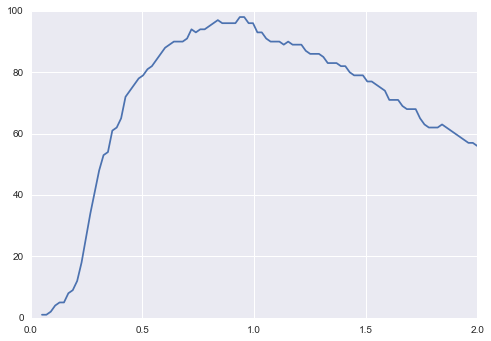

In [127]:
from sklearn.cluster import DBSCAN

sizes = []

for eps in np.linspace(0.05, 2, 100):
    cls = DBSCAN(eps=eps)
    cls.fit(tsne_representation)
    size = len(set(cls.labels_))
    sizes.append(size)
    if (size >= 95 and size <= 100):
        print("Size: {}, Eps: {}".format(size, eps))
    
plt.plot(np.linspace(0.05, 2, 100), sizes)

79


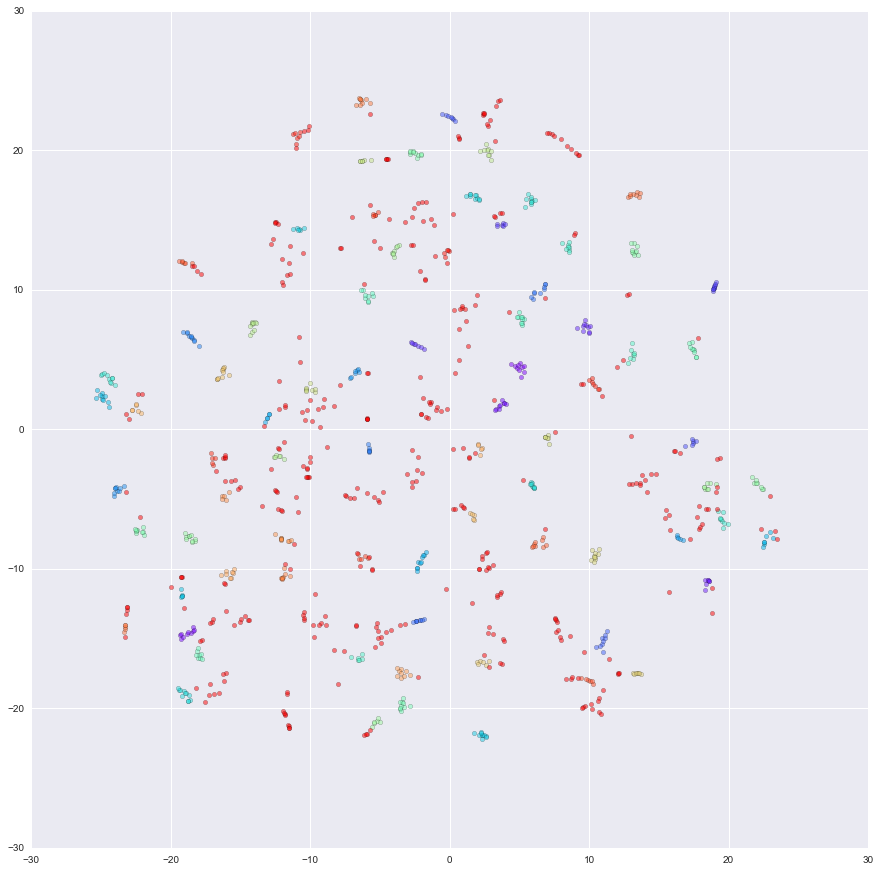

In [89]:
from sklearn.cluster import DBSCAN
cls = DBSCAN(eps=0.5)
cls.fit(tsne_representation)
print(len(set(cls.labels_)))

plt.subplots(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, len(set(cls.labels_))))
for y_, c in zip(set(cls.labels_), colors):
    plt.scatter(tsne_representation[cls.labels_==y_, 0], 
                tsne_representation[cls.labels_==y_, 1], c=c, alpha=0.5, label=str(y_))
# plt.legend()

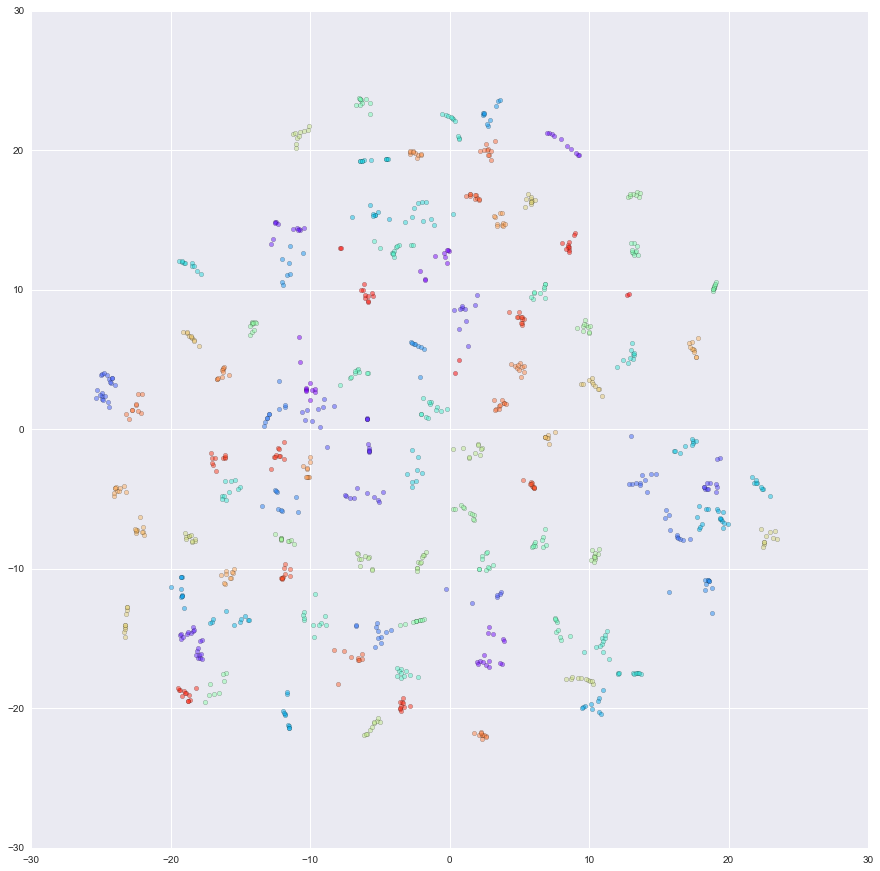

In [91]:
from sklearn.cluster import AgglomerativeClustering

cls = AgglomerativeClustering(n_clusters=99)
cls.fit(tsne_representation)

plt.subplots(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, len(set(cls.labels_))))
for y_, c in zip(set(cls.labels_), colors):
    plt.scatter(tsne_representation[cls.labels_==y_, 0], 
                tsne_representation[cls.labels_==y_, 1], c=c, alpha=0.5, label=str(y_))
# plt.legend()

In [107]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette(X, cluster_labels, n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 20)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 99 The average silhouette_score is : 0.708516124487


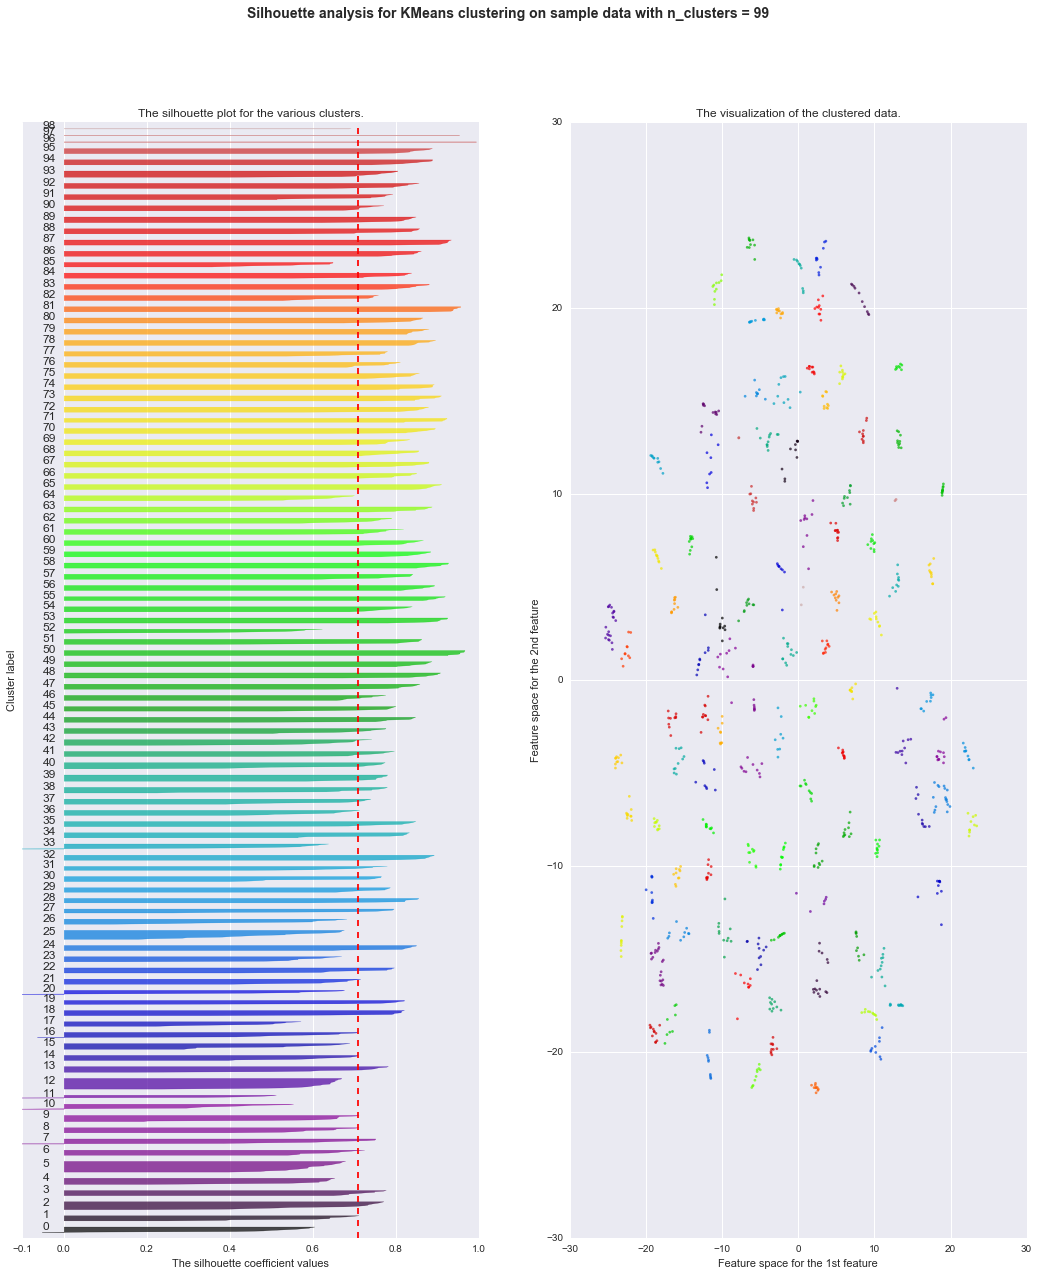

In [108]:
silhouette(tsne_representation, cls.labels_, len(set(cls.labels_)))

Size: 95, Eps: 0.7717171717171717
Size: 95, Eps: 0.7909090909090909
Size: 95, Eps: 0.81010101010101
Size: 96, Eps: 0.8292929292929292
Size: 97, Eps: 0.8484848484848484
Size: 96, Eps: 0.8676767676767676
Size: 95, Eps: 0.8868686868686868
0.635337978899


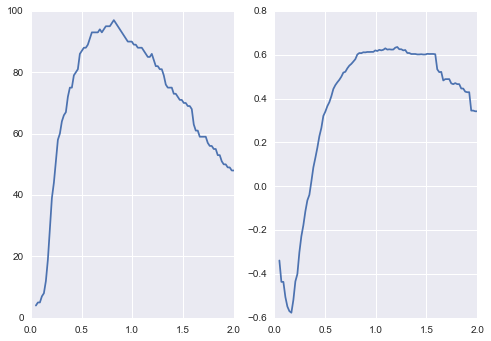

In [142]:
sizes = []
sil_metrics = []

for eps in np.linspace(0.1, 2, 100):
    cls = DBSCAN(eps=eps, metric='minkowski', p=4)
    cls.fit(tsne_representation)
    sil_metrics.append(silhouette_score(tsne_representation, cls.labels_))
    size = len(set(cls.labels_))
    sizes.append(size)
    if (size >= 95 and size <= 100):
        print("Size: {}, Eps: {}".format(size, eps))
    
fig, (ax1, ax2) = plt.subplots(1,2) 
ax1.plot(np.linspace(0.05, 2, 100), sizes)
print(np.max(sil_metrics))
ax2.plot(np.linspace(0.05, 2, 100), sil_metrics)
plt.show()

For n_clusters = 97 The average silhouette_score is : 0.604894546723


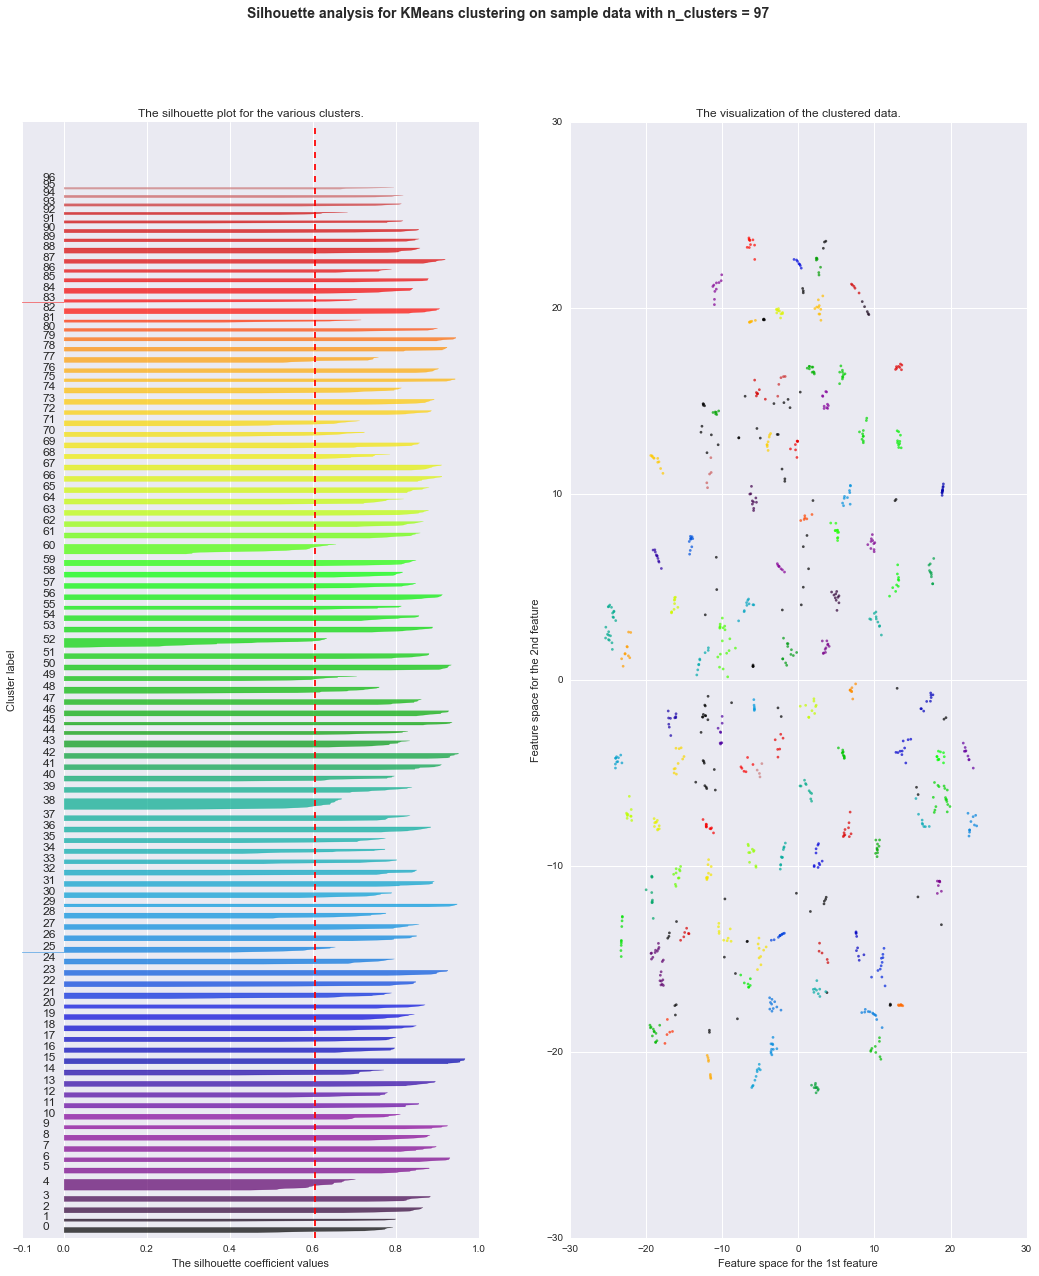

In [126]:
db_cls = DBSCAN(eps=0.8575757575757575, metric='minkowski', p=4)
db_cls.fit(tsne_representation)
silhouette(tsne_representation, db_cls.labels_, len(set(db_cls.labels_)))

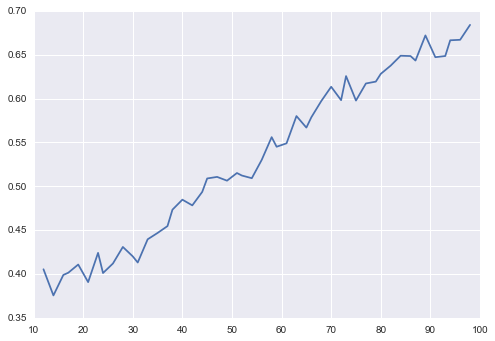

In [154]:
from sklearn.cluster import MiniBatchKMeans

sil_scores = []
n_clusters = np.round(np.linspace(12,98,50))

for n in n_clusters:
    cls = MiniBatchKMeans(n_clusters=int(n))
    cls.fit(tsne_representation)
    score = silhouette_score(tsne_representation, cls.labels_)
    sil_scores.append(score)

plt.plot(n_clusters, sil_scores)

In [156]:
n_clusters[np.argmax(sil_scores)]

98.0

For n_clusters = 97 The average silhouette_score is : 0.684239321323


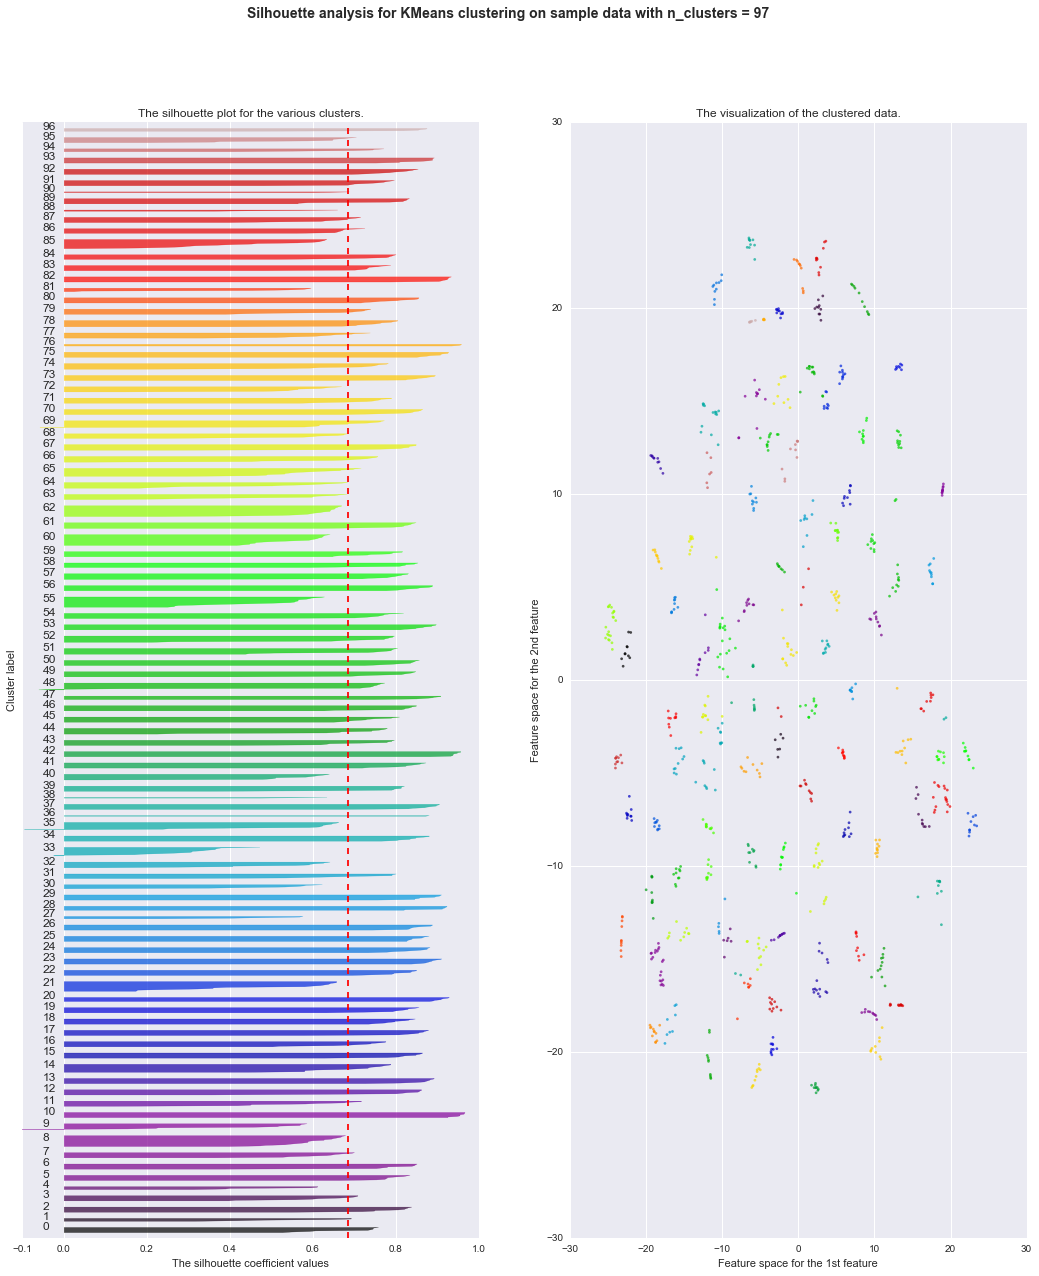

In [157]:
k_cls = MiniBatchKMeans(n_clusters=98)
k_cls.fit(tsne_representation)
silhouette(tsne_representation, k_cls.labels_, len(set(k_cls.labels_)))

In [162]:
from xgboost import XGBClassifier

clf = XGBClassifier()
scores = cross_val_score(clf, tsne_representation, labels, scoring='neg_log_loss', cv = StratifiedKFold(5))
print("{} +-{}".format(scores.mean(), scores.std()**2))

-0.7515805796089798 +-0.0027741424492536437


In [199]:
combo_x = pd.DataFrame()
combo_x['knn_labels'] = MiniBatchKMeans(n_clusters=98).fit(tsne_representation).labels_
combo_x['dbscan_labels'] = DBSCAN(eps=0.8575757575757575, metric='minkowski', p=4).fit(tsne_representation).labels_
combo_x['agl_labels'] = AgglomerativeClustering(n_clusters=99).fit(tsne_representation).labels_
combo_x.head()

,knn_labels,dbscan_labels,agl_labels
0,15,0,91
1,93,1,3
2,66,2,80
3,12,3,95
4,92,19,46


In [200]:
clf = XGBClassifier()
scores = cross_val_score(clf, combo_x, labels, scoring='neg_log_loss', cv = StratifiedKFold(5))
print("{} +-{}".format(scores.mean(), scores.std()**2))

-0.34056055087106996 +-0.0019712022496660617


In [245]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=9,weights='distance', algorithm='ball_tree'), tsne_representation, labels, scoring='neg_log_loss', cv = StratifiedKFold(5))
print("{} +-{}".format(scores.mean(), scores.std()**2))

-0.30850656261045095 +-0.03697546488005312


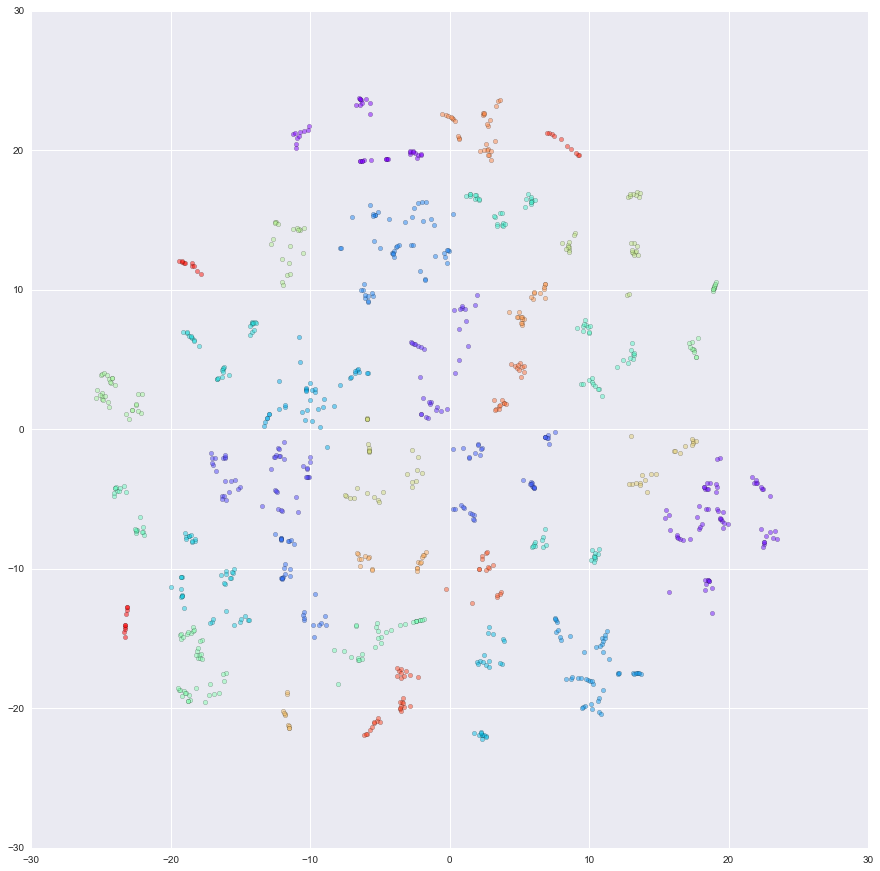

In [249]:
# Посмотрим, что будет если число кластеров уменьшить до кол-ва видов, исключив подвиды
# Вывод - стало хуже, так как в кластеры объединились не виды а перемешанные соседние подвиды.

shorten_clusters = len(set(y_groups))

cls = AgglomerativeClustering(n_clusters=shorten_clusters)
cls.fit(tsne_representation)

plt.subplots(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, len(set(cls.labels_))))
for y_, c in zip(set(cls.labels_), colors):
    plt.scatter(tsne_representation[cls.labels_==y_, 0], 
                tsne_representation[cls.labels_==y_, 1], c=c, alpha=0.5, label=str(y_))
# plt.legend()

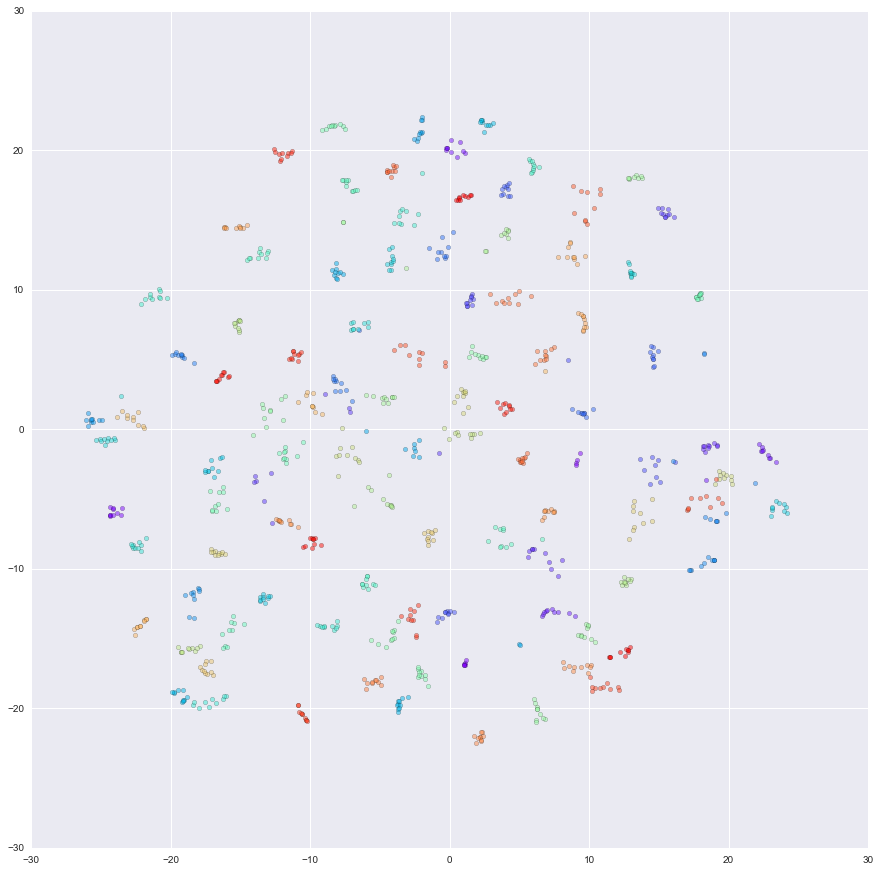

In [267]:
tsne2 = TSNE(n_components=2, init='pca', metric='manhattan', n_iter=2000)
tsne_representation2 = tsne2.fit_transform(x)

plt.subplots(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, len(set(y))))
for y_, c in zip(set(y), colors):
    plt.scatter(tsne_representation2[y.values==y_, 0], 
                tsne_representation2[y.values==y_, 1], c=c, alpha=0.5, label=str(y_))

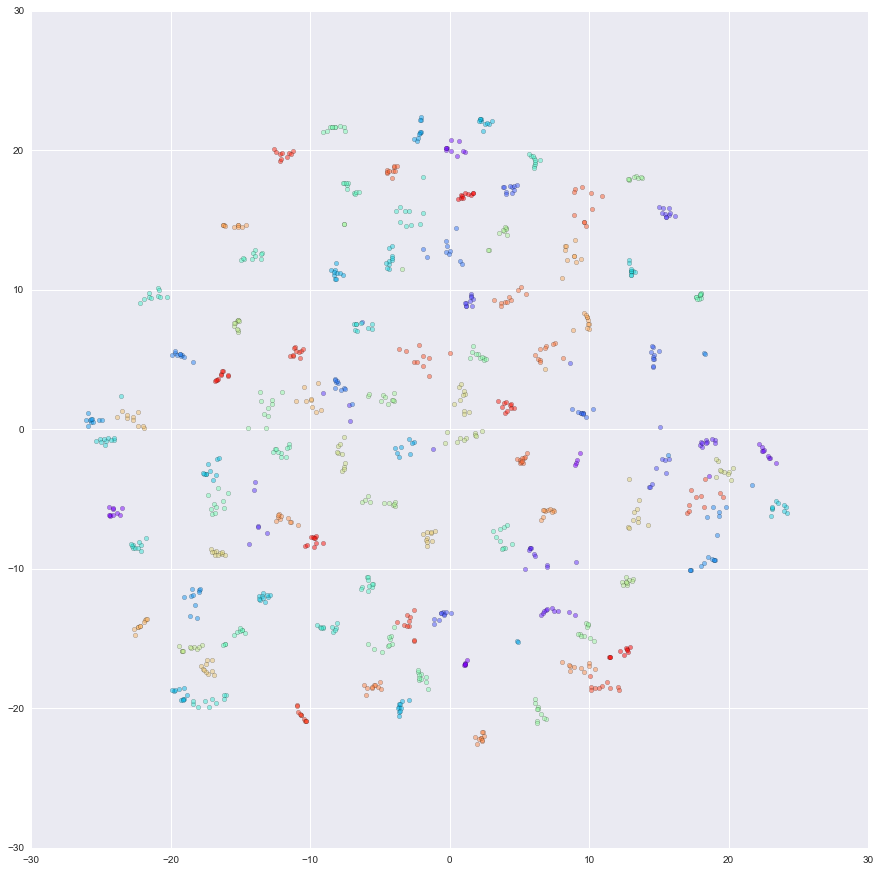

In [266]:
tsne2 = TSNE(n_components=2, init='pca', metric='cityblock')
tsne_representation2 = tsne2.fit_transform(x)

plt.subplots(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, len(set(y))))
for y_, c in zip(set(y), colors):
    plt.scatter(tsne_representation2[y.values==y_, 0], 
                tsne_representation2[y.values==y_, 1], c=c, alpha=0.5, label=str(y_))